In [1]:
from graphviz import Digraph

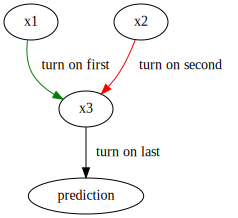

In [23]:
dot = Digraph()
dot.node('1', 'x1')
dot.node('2', 'x2')
dot.node('3', 'x3')
dot.node('y', 'prediction')

dot.edge('1', '3', 'turn on first', color='green')
dot.edge('2', '3', 'turn on second', color='red')
dot.edge('3', 'y', 'turn on last')
dot

BFS based flow would fail because cannot backprop credit to the green and red edge without linearization.

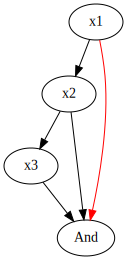

In [4]:
dot = Digraph()
dot.node('1', 'x1')
dot.node('2', 'x2')
dot.node('3', 'x3')
dot.node('y', 'And')

dot.edges(['12', '23', '2y', '3y'])
dot.edge('1', 'y', color='red')
dot

This fails node first flow (flow0.py) because it assumes the red edge always appear first thus giving 0 contribution to it.

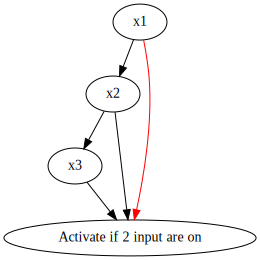

In [14]:
dot = Digraph()
dot.node('1', 'x1')
dot.node('2', 'x2')
dot.node('3', 'x3')
dot.node('y', 'Activate if 2 input are on')

dot.edges(['12', '23', '2y', '3y'])
dot.edge('1', 'y', color='red')
dot

This fails edge first flow (flow1.py) because the red edge can only appear first or last.

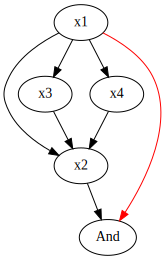

In [13]:
dot = Digraph()
dot.node('1', 'x1')
dot.node('2', 'x2')
dot.node('3', 'x3')
dot.node('4', 'x4')
dot.node('y', 'And')

dot.edges(['12', '13', '14', '32', '42', '2y'])
dot.edge('1', 'y', color='red')
dot

This fails path first flow (permuting path) because I can make the red edge contribution as large as possible by adding intermediate nodes.

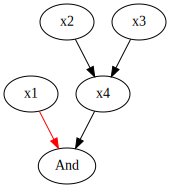

In [25]:
dot = Digraph()
dot.node('1', 'x1')
dot.node('2', 'x2')
dot.node('3', 'x3')
dot.node('4', 'x4')
dot.node('y', 'And')

dot.edges(['4y', '24', '34'])
dot.edge('1', 'y', color='red')
dot

This fails edge first backtrack (trace from the target instead of from the source) because it assumes x1 happens first twice as often as x2 and x3, which is not a justifiable assumption. Note that path first flow would work in this case (there is no path first back tracing b/c path first assumes every path is equally likely).

## Solutution?

Edge first backtrack to single source: Trace from the target to the sources one at a time in the order of node activation